In [4]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

Populating the interactive namespace from numpy and matplotlib


In [5]:
trajfile = []
for i in range(1,6):
    path = '/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md'+str(i)+'.nc'
    trajfile.append(path)

top = "/net/jam-amaro-shared/bccgc4/Strided_Traj/protein.h5"

#assigns the features
positions_feat = coor.featurizer(top)
positions_feat.add_selection([1024, 1027, 306, 1029, 1031, 1033, 2851, 1035, 1036, 1037, 1038, 1039, 1034, 1040, 1042, 1043, 1044, 1045, 1041, 2854, 1049, 2076, 311, 1060, 1061, 1062,
                              1072, 1074, 1076, 1087, 2112, 2116, 2120, 2122, 2123, 2126, 2135, 323, 2138, 324, 325, 1133, 1134, 1135, 1136, 1137, 2170, 330, 3206, 3207, 3208, 3210, 3323, 
                              334, 3219, 336, 2207, 2209, 2210, 2211, 2213, 2214, 2215, 2217, 2219, 2220, 2221, 3244, 1715, 1716, 1743, 1745, 1747, 1749, 2897, 3312, 3313, 3314, 3315, 3316, 
                              3317, 3318, 3319, 3320, 3321, 3322, 2837, 328, 329, 2899, 339, 342, 343, 350, 2911, 354, 359, 361, 362, 363, 364, 365, 366, 367, 379, 385, 386, 395, 398, 2449, 
                              2451, 2452, 2453, 2454, 2455, 2456, 2460, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2477, 2478, 941, 2480, 2481, 946, 2834, 944, 2486, 
                              2487, 2488, 2835, 2492, 2836, 2494, 963, 2838, 2506, 2507, 2508, 2839, 2510, 972, 978, 979, 980, 2841, 2842, 2844, 997, 2845, 1003, 2846, 1008, 1007, 1010, 
                              1009, 2847, 1012, 1013, 1011, 1016, 1017, 1018, 1022])
#selecting receptor atoms (2 angstroms from the previously docked ligands)
    
inp = coor.source(trajfile, positions_feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())
  



trajectory length =  90000
number of dimension =  519


In [6]:
lag=1000
tica_obj = coor.tica(inp, lag=lag, var_cutoff=0.95, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()
#print('Projected data shape = ', Y.shape)

print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))
print(-lag/np.log(tica_obj.eigenvalues[:5]))

#making clusters from kmeans
cl = coor.cluster_kmeans(data=Y,k=10, max_iter=30)

# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
#plotting out the results and clustercenters 
#contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
#plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))


Mean values:  [[-0.28761902  0.3716856   0.4010784  ...  1.2910272  -0.54769206
   0.10522471]
 [-0.3068656   0.3419678   0.5033592  ...  0.7492968  -0.53855497
   0.4090151 ]
 [-0.26636064  0.188281    0.46544772 ...  1.581965   -0.2505081
   0.45986706]
 ...
 [ 0.10754893  0.08389375 -0.22677259 ...  0.44256097 -0.0183167
  -0.04880885]
 [ 0.06667481 -0.09185471 -0.4199338  ...  0.27645612  0.06210398
   0.46078843]
 [ 0.14679523 -0.00767326 -0.43359    ... -0.22097889 -0.47857094
   0.9367925 ]]
Variances:    [[9.7315310e-04 3.7800154e-01 6.3307688e-02 ... 1.3202274e-01
  4.8284227e-01 7.3542237e-02]
 [5.2690036e-03 3.5271320e-01 5.8286488e-02 ... 2.0616095e-01
  1.8756244e-01 3.1158477e-01]
 [1.6829647e-02 2.7787805e-01 7.7416025e-02 ... 2.2550222e-01
  1.9274302e-01 2.8806603e-01]
 ...
 [1.1537827e+00 8.6258984e-01 5.9435356e-01 ... 3.8154382e-01
  8.1475055e-01 5.9733903e-01]
 [1.2840940e+00 9.1873562e-01 7.6743710e-01 ... 5.6625527e-01
  3.5936314e-01 8.3545762e-01]
 [1.4402258e

[array([5, 5, 5, ..., 9, 9, 9], dtype=int32), array([5, 5, 5, ..., 9, 9, 9], dtype=int32), array([5, 5, 5, ..., 0, 0, 0], dtype=int32), array([5, 5, 5, ..., 7, 7, 7], dtype=int32), array([5, 5, 5, ..., 2, 2, 2], dtype=int32)]
450000


In [38]:
#cl.converged

AttributeError: 'KmeansClustering' object has no attribute 'len'

[-0.41860256 -0.33362222 -0.5256514   2.8938441   0.45940846 -0.3511522
  2.4782634   2.4029636  -0.322824   -0.36820668]
[-0.5969853   0.62399006 -1.7856678  -0.47143304 -1.0727414   0.36021397
 -0.02408678  0.01706206  0.8749726   0.48312512]


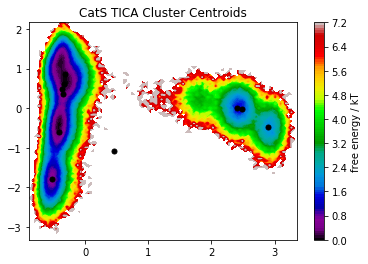

In [7]:
#plots free energy diagram, tic0 and 1
fig, axes= mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
title("CatS TICA Cluster Centroids" )

fig.savefig("tica_FE_recepatoms_feat_1.png", dpi = 100)

print(cc_x)
print(cc_y)

In [ ]:
#plotting free energy and labeling the centroids

for s in range(6):
    fig, ax = plt.subplots(1, 6, sharex='col', sharey='row', figsize = (20,3.4)) #creating 1x6 subplot grid
    
    for w in range(6):
        mplt.plot_free_energy(np.vstack(Y)[:,s], np.vstack(Y)[:,w], ax = ax[w], cmap = 'viridis')#, cbar = False, cbar_label = None)
        cc_x = cl.clustercenters[:,s]
        cc_y = cl.clustercenters[:,w]
        ax[w].plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='red')
    
    for a in range(6):
        ax[a].title.set_text('TIC '+str(a))
        
    #fig.text(0.5, 0.04, 'pIC50', ha = 'center')
    fig.text(0.001, 0.5, 'TIC '+str(s), va = 'center', rotation='vertical')
    
    fig.suptitle('TICA Cluster Centroids',fontsize = 16)
    fig.tight_layout()

    plt.savefig('/home/jegan/Clustering_methods/TICA/figs/recepatoms/TICA_FE_TIC'+str(s)+'.png', bbox_inches = 'tight')

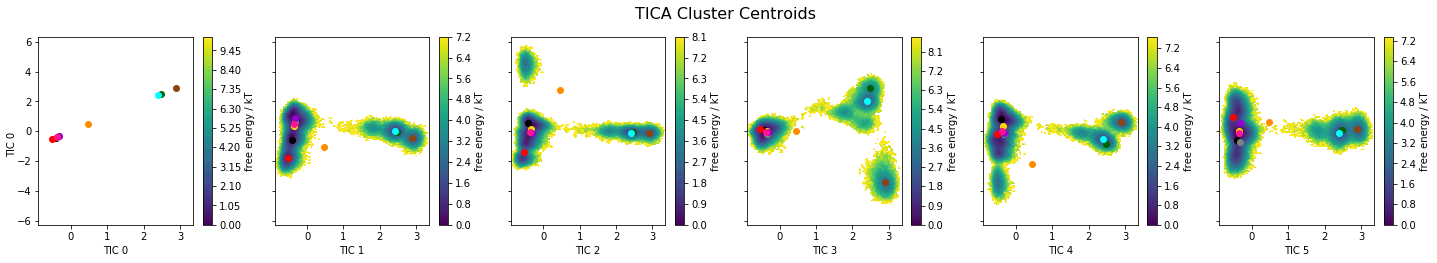

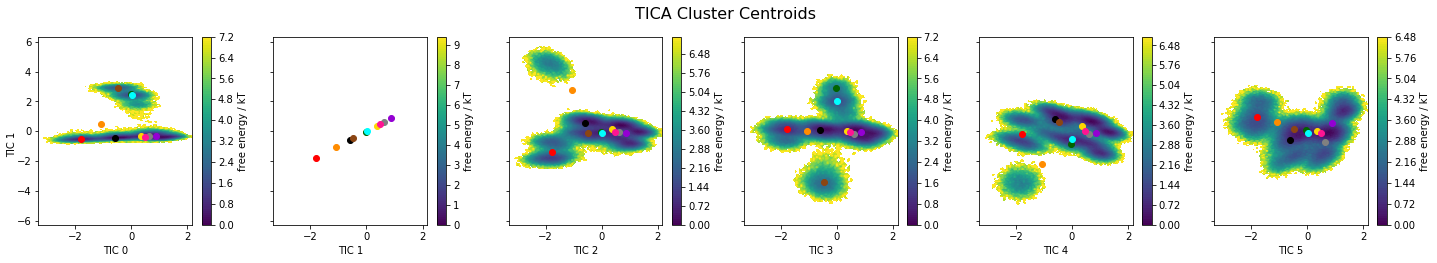

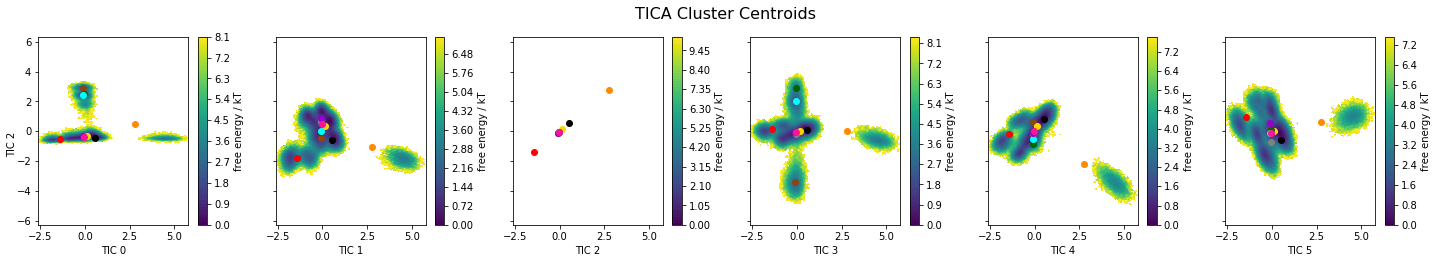

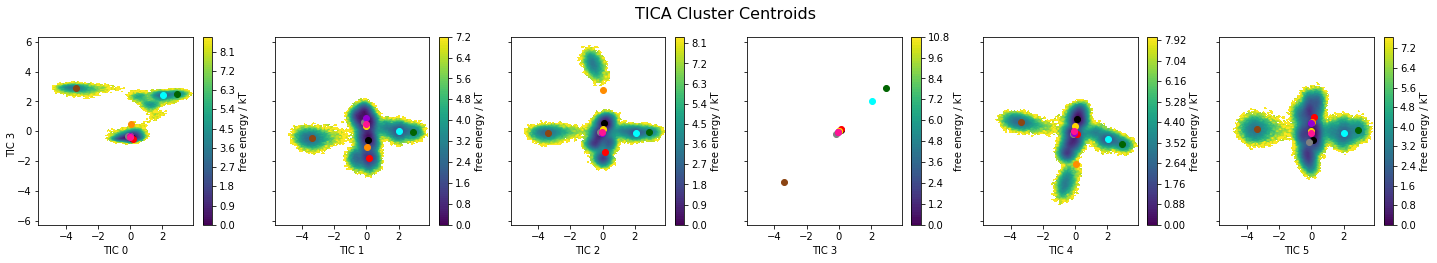

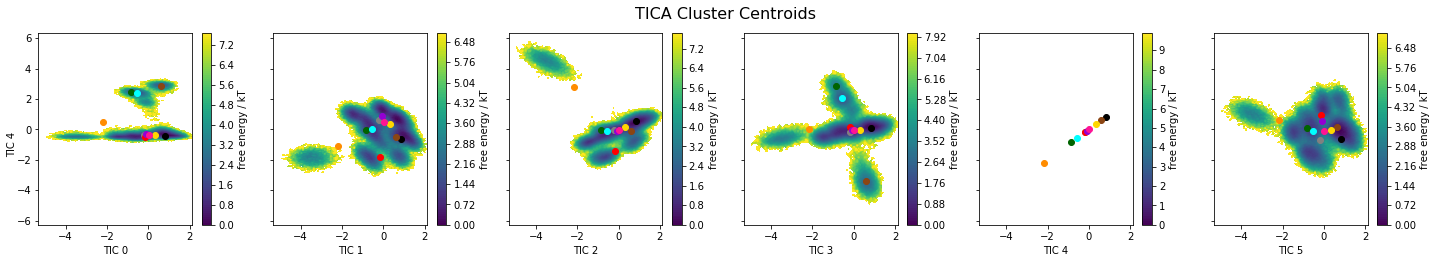

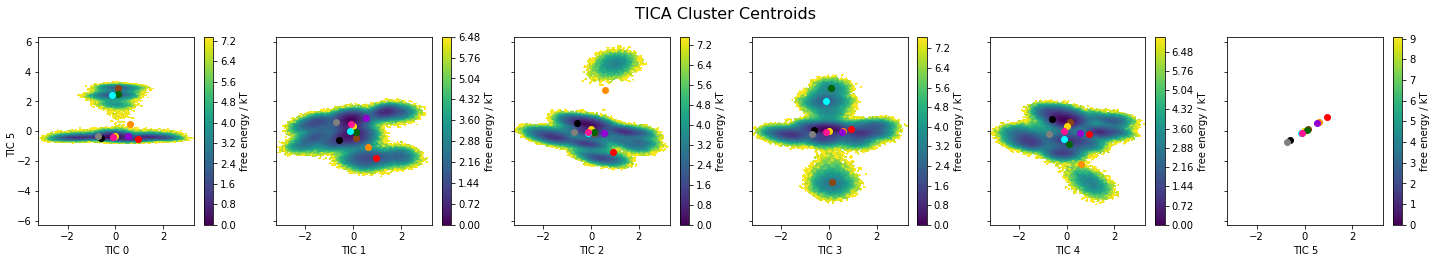

In [34]:
#plotting the free energy in subplots for tics 0-5

for s in range(6):
    fig, ax = plt.subplots(1, 6, sharex='col', sharey='row', figsize = (20,3.4)) #creating 1x6 subplot grid
    
    for w in range(6):
        mplt.plot_free_energy(np.vstack(Y)[:,s], np.vstack(Y)[:,w], ax = ax[w], cmap = 'viridis')#, cbar = False, cbar_label = None)
        cc_x = cl.clustercenters[:,s]
        cc_y = cl.clustercenters[:,w]
        #ax[w].plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='red')
        colors = ['black','gray','red','saddlebrown','darkorange','gold','darkgreen','aqua','darkviolet','deeppink']
        for i in range(10):
            ax[w].scatter(cc_x[i], cc_y[i], color = colors[i])
    
    for a in range(6):
        ax[a].set(xlabel = ('TIC '+str(a)))
        
    fig.text(0.001, 0.5, 'TIC '+str(s), va = 'center', rotation='vertical')
    
    fig.suptitle('TICA Cluster Centroids',fontsize = 16, y=1.06)
    fig.tight_layout()

    plt.savefig('/home/jegan/Clustering_methods/TICA/figs/recepatoms/TICA_FE_TIC'+str(s)+'.png', bbox_inches = 'tight')

    



In [10]:
#This tells us how much each feature contributes to each TIC
tica_obj.feature_TIC_correlation

array([[-0.3764669 , -0.04605064,  0.14493383, ...,  0.02913061,
         0.13341134, -0.02264581],
       [-0.54642067,  0.03716876,  0.05601991, ...,  0.05364165,
        -0.00444942, -0.02159248],
       [ 0.66820248,  0.17836905, -0.10819322, ...,  0.01292254,
        -0.05717765,  0.08944852],
       ...,
       [-0.76247753,  0.08025953,  0.09986145, ...,  0.04002333,
         0.08600539, -0.03403482],
       [ 0.629205  , -0.03423635,  0.01808306, ...,  0.09651625,
         0.03919185, -0.01281939],
       [ 0.71656616,  0.11708125, -0.11113621, ..., -0.008258  ,
        -0.06336791,  0.05107766]])

In [18]:
#This tells us the number of TICs TICA produces to retain the variance we want, which is .95
#tica_obj.cumvar

In [53]:
#This prints the discrete trajectories we saved out before, then saves out the percent of frames in each cluster
print(dtrajs)
print(dtrajs[0])

with open('/home/jegan/Clustering_methods/TICA/clusters_receptors.txt', 'w') as newfile:
    numb = []
    for i in range(10):
        frames = []
        for k in dtrajs:
            for p in k:
                if p == i:
                    frames.append(p)

        print(len(frames))
        numb.append(len(frames))
    
    newfile.write('Percent of frames per TICA recepatoms cluster:\n')
    tot = 0
    index = 0
    for j in numb:
        tot += j
        percent = (j/450000)*100
        num = str(percent)
        newfile.write('Cluster '+ str(index)+' = '+num+'\n')
        index += 1
    print(tot)
#cl.index_clusters
#shape(cl.index_clusters)
#dtraj=max(dtrajs)
#print(dtraj)

[array([5, 5, 5, ..., 9, 9, 9], dtype=int32), array([5, 5, 5, ..., 9, 9, 9], dtype=int32), array([5, 5, 5, ..., 0, 0, 0], dtype=int32), array([5, 5, 5, ..., 7, 7, 7], dtype=int32), array([5, 5, 5, ..., 2, 2, 2], dtype=int32)]
[5 5 5 ... 9 9 9]
56621
74395
52127
19707
18031
90151
6343
25990
64821
41814
450000


In [48]:
#Extracting Centroids

avg = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

indices = {}
for i in range(len(Y)):
    print(len(Y))
    #for k in range(len(Y[0][i])):
    for k in range(len(Y[i])):
        #print(len(Y[i]))
        c = cl.clustercenters[cl.dtrajs[i][k]]
        v = Y[i][k]
        newavg = np.linalg.norm(c-v)
        if avg[cl.dtrajs[i][k]] > newavg:
            avg[cl.dtrajs[i][k]] = newavg
            indices[cl.dtrajs[i][k]] = [i, k]

#trajectory=md.load(['/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md1.nc', '/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md2.nc', '/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md3.nc', '/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md4.nc', '/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_md5.nc'], top="/net/jam-amaro-shared/bccgc4/Strided_Traj/protein.h5")

#z = 0
#for key in indices:
#        z = z + 1
#        index = indices[key][1]*(1 + indices[key][0])
        #print(index)
#        i = trajectory[index].topology.select("protein")
#        new_traj = trajectory[index].atom_slice(i)
#        new_traj.save_pdb('/home/jegan/Clustering_methods/TICA/TICA_recepatoms_feat_centroids/TICA_%s.pdb' % (z-1))

5
5
5
5
5
